In [ ]:
!pip install -q roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 17.1 MB/s eta 0:00:00


In [ ]:
!pip install supervision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



0: 608x608 1 Bubble, 1 Golf Ball, 74.6ms
Speed: 2.8ms preprocess, 74.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 608)


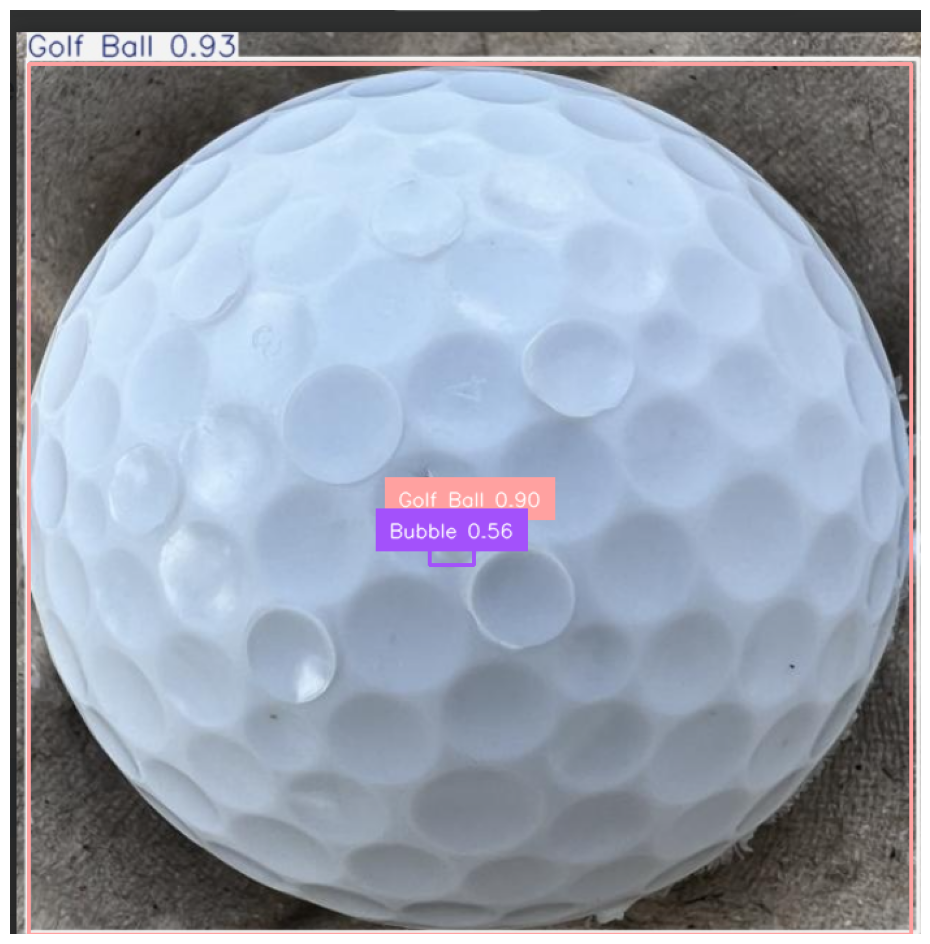

In [ ]:
# Create a bounding box annotator object.
from ultralytics import YOLO
import supervision as sv
import cv2

# Load a pre-trained YOLOv8 model (e.g., yolov8n for YOLOv8 Nano)
model = YOLO('/content/drive/MyDrive/client project/defect/weights/best (6).pt')
bounding_box = sv.BoxAnnotator()

image = "/content/image (2).png"

frame = cv2.imread(image)
# Run inference on the frame
results = model(frame)

# Parse the result into the detections data model (using Supervision's Detections)
detections = sv.Detections.from_ultralytics(results[0])  # Use 'from_ultralytics' to parse results




labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

label_annotator = sv.LabelAnnotator(text_position=sv.Position.CENTER)


# Annotate our frame with detections.
annotated_frame = bounding_box.annotate(scene=frame.copy(), detections=detections)


annotated_frame = label_annotator.annotate(
    scene=annotated_frame.copy(),
    detections=detections,
    labels=labels
)
# Display the frame.
sv.plot_image(annotated_frame)